# Data Import from Instagram, Survey and Instagram API

<img src="instagram_logo.jpg" alt="Instagram Logo" width="300"/>

In [27]:
import pandas as pd
import numpy as np

import re

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## data collected from Instagram manually

In [28]:
instagram = pd.read_excel('instagram_clean.xlsx')
instagram.astype({'Comments': 'int64','Likes':'int64'})
instagram.drop(['Unnamed: 0'],axis=1,inplace=True)
instagram.head()

,User,#Followers,#Posts,Photo Location,Likes,Comments,Places,People,#
0,abcdosviajantes,10400,414,Praia De Carro Quebrado,64,27,Beach,False,False
1,abcdosviajantes,10400,414,None,45,8,Food,False,False
2,abcdosviajantes,10400,414,"Pedra Do Arpoador, Rio De Janeiro",65,34,Beach,False,False
3,abcdosviajantes,10400,414,Maceió-Alagoas/ Nordeste Do Brasil,68,17,Beach,False,False
4,abcdosviajantes,10400,414,Brasil,90,33,Nature,False,False


## data collected from API for the same profiles above

In [29]:
api_info = pd.read_excel('api_data.xlsx')
api_info.drop(columns=['Unnamed: 0'],inplace=True)
api_info.head()

,pk,username,like_count,comment_count,short_name,facebook_places_id,city,lng,lat,text
0,11704287485,abcdosviajantes,32,5,Escadaria Selarón,1.292938e+14,NaN,-43.179456,-22.915445,Aqui vai um pouquinho da história da escadari...
1,11704287485,abcdosviajantes,66,27,Praia De Carro Quebrado,3.343768e+14,"Maceió, Brazil",-35.707433,-9.661238,Se você está curioso sobre a origem do nome ...
2,11704287485,abcdosviajantes,45,8,NaN,NaN,NaN,NaN,NaN,"A gastronomia no início de seu surgimento, er..."
3,11704287485,abcdosviajantes,65,34,Pedra Do Arpoador,1.411825e+14,NaN,-43.100767,-22.858558,Você gosta de pôr do sol??? ☀️\n\nEntão aqu...
4,11704287485,abcdosviajantes,68,17,Maceió-Alagoas/ Nordeste Do Brasil,1.004378e+14,NaN,-35.724263,-9.625366,"📍Dunas de Marapé, Alagoas.\n\nOntem perguntam..."


## data collected from survey

In [30]:
survey = pd.read_excel('survey_clean.xlsx')
survey.drop(['Unnamed: 0','index'],axis=1,inplace=True)
survey.head()

,Carimbo de data/hora,Follow Profile,Follow Hashtag,People or Place,Caption important?,"Culture, Nature or Food",Comment Freq
0,2020/11/16 3:36:24 PM GMT,1,0,0,0,"nature for example beaches, waterfalls etc",1
1,2020/11/16 3:36:40 PM GMT,1,0,1,0,"cultural eg museums, statues etc",1
2,2020/11/16 3:39:10 PM GMT,1,0,1,0,"nature for example beaches, waterfalls etc",2
3,2020/11/16 3:55:11 PM GMT,1,1,0,1,"nature for example beaches, waterfalls etc",1
4,2020/11/16 4:09:03 PM GMT,1,1,0,0,"nature for example beaches, waterfalls etc",1


# Inferential statistics
## Go deep into information colleteced and try to understand better how features are relate

* Q1 - Understand the target public (market search) --> Survey
* Q2 - People who follow travel profile, follow some specific hashtag related to travel? --> Survey
* Q3 - The amount of followers is related with the amount of posts that a profile have? ($\uparrow$ followers $\uparrow$ posts)
* Q4 - Photo with people has more likes than without people? (relate people with likes)
* Q5 - Hashtags is important to get likes? (relate likes with hashtags)
* Q6 - Wich type of places have more likes?

Let's investigate these claims and see if we can find proof to refute or support them.

## Question 1 and 2:

### From the Survey we get our target public using `confidence interval` for the questions: 'Do you follow any travel Instagram?' and 'Do you follow any travel-related hashtag?'.

### For profile: (0.4638890446167189, 0.7633836826560083)

### For hashtags: (0.0804922492952757, 0.3285986597956334)

It can be concluded that there is a confidence interval considered reasonable that shows the population's interest in the topic. On the other hand, people don't care about hashtags.

In [31]:
import scipy.stats as st

In [32]:
instagram.head()

,User,#Followers,#Posts,Photo Location,Likes,Comments,Places,People,#
0,abcdosviajantes,10400,414,Praia De Carro Quebrado,64,27,Beach,False,False
1,abcdosviajantes,10400,414,None,45,8,Food,False,False
2,abcdosviajantes,10400,414,"Pedra Do Arpoador, Rio De Janeiro",65,34,Beach,False,False
3,abcdosviajantes,10400,414,Maceió-Alagoas/ Nordeste Do Brasil,68,17,Beach,False,False
4,abcdosviajantes,10400,414,Brasil,90,33,Nature,False,False


## Question 3: The amount of followers is related with the amount of posts that a profile have? ($\uparrow$ followers $\uparrow$ posts)

In [33]:
users = instagram['User'].unique().tolist()
followers = instagram['#Followers'].unique().tolist()
posts = instagram['#Posts'].unique().tolist()

In [34]:
# we have to exclude an outlier in our sample

followers = [10400, 65200, 34900, 41200, 67800, 22600, 22700, 31400, 18600]
posts = [414, 894, 379, 693, 1182, 548, 197, 532, 363]

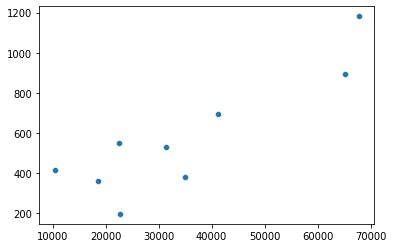

In [35]:
sns.scatterplot(followers,posts)
plt.show()

In [36]:
# linear regression

x = np.array(followers)
y = np.array(posts)

regression = st.linregress(x,y)
#print(regression)
results = regression.slope*x + regression.intercept
rsquare = regression.rvalue**2
pValue = regression.pvalue
print('Rsquare is',rsquare)
print('p-value:', pValue)

Rsquare is 0.7729783539916548
p-value: 0.0017894949838157125


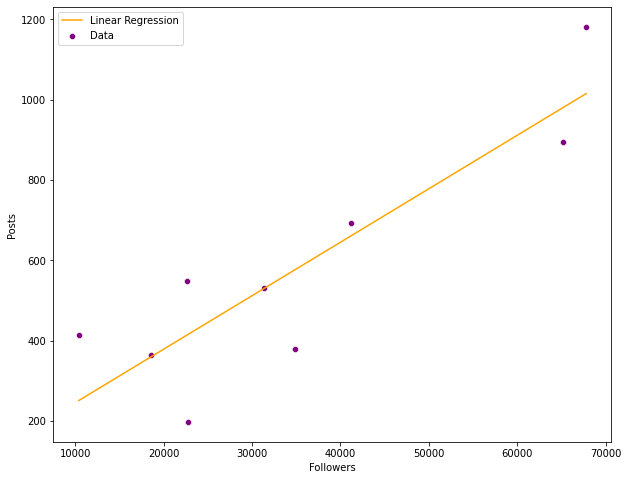

In [37]:
f , (ax) = plt.subplots(figsize=(10,8))
ax = sns.lineplot(x,results, color='orange',label='Linear Regression')
ax = sns.scatterplot(followers,posts, color='purple',label='Data')
ax.set_xlabel('Followers')
ax.set_ylabel('Posts')
ax.legend()
#ax.savefig("linear_regression.png")
plt.show()

In [38]:
## Linear relationship between number of followers and amount of posts

## Question 4: Photo with people has more likes than without people? (relate people with likes)

The chi squared test check if there is independence between two samples.

$H_{0}$ = The amount of likes does not depende if are people in the photo

First we need to divide the likes by "popular" or not... I use 1000 likes as filter

In [39]:
people = instagram[['People','Likes']]
people['Likes'] = np.where(people['Likes']>=1000,True,False)

In [40]:
people.head()

,People,Likes
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [196]:
table = pd.crosstab(people['People'],people['Likes'])

In [197]:
from scipy.stats import chi2_contingency
# Chi-square test of independence.
chi2, p, dof, ex = st.chi2_contingency(table)
print('The test statistic is {0} \nThe p-value of the test is {1} \nDegrees of freedom = {2} '.format(chi2,p,dof))

The test statistic is 6.515729352943323 
The p-value of the test is 0.010692446029280068 
Degrees of freedom = 1 


### Conclusion: Reject the null hypothesis. The number of likes depende if have people in the photo.

## Question 5: Hashtags is important to get likes? (relate likes with hashtags)

Using the same idea for dataframe filter previous and the same ideia to null hypothesis but for hashtags

In [200]:
hashtags = instagram[['#','Likes']]
hashtags['#'] = np.where(hashtags['Likes']>=1000,True,False)

In [201]:
table = pd.crosstab(hashtags['#'],hashtags['Likes'])

In [202]:
from scipy.stats import chi2_contingency
# Chi-square test of independence.
chi2, p, dof, ex = st.chi2_contingency(table)
print('The test statistic is {0} \nThe p-value of the test is {1} \nDegrees of freedom = {2} '.format(chi2,p,dof))

The test statistic is 100.0 
The p-value of the test is 0.3696681720040789 
Degrees of freedom = 96 


### Conclusion: Accept the null hypothesis. The number of likes doesn't depende if have hashtags in the photo.

## Question 6: Wich type of places have more likes?

### Place | Location

Checking if all types of place have the same average for likes?

Looking the instagram dataframe, we have the idea that Beach have much more likes than anywhere.

Let's first check the mean of each type of place using `ANOVA`

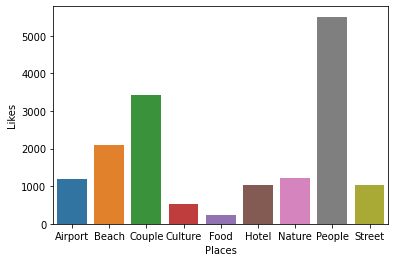

In [61]:
plc = instagram.groupby('Places').agg({'Likes':'mean'}).reset_index()
sns.barplot(plc['Places'],plc['Likes'])
#fig.savefig("places.png")
plt.show()

In [186]:
# Types of places
places_list = instagram['Places'].unique().tolist()

In [172]:
df_list = []
for place in places_list:
    df = instagram[instagram['Places']==str(place)]
    lst = df['Likes'].tolist()
    df_list.append(lst)

## ANOVA Test

In statistics, Analysis of Variance (ANOVA) is also used to analyze the differences among group means. The difference between t-test and ANOVA is the former is ued to compare two groups whereas the latter is used to compare three or more groups.

* $H_0$: the means for each type of place are equal --> $\mu_{Airport} = \mu_{Beach} = \mu_{Couple} = \mu_{Culture} = \mu_{Food} = \mu_{Hotel} = \mu_{Nature} = \mu_{People} = \mu_{Street}$

* $H_1$: the means for each type of place are different

In [173]:
tStats, pValue = st.f_oneway(*df_list)
print('P-value: {0} \nF statistic: {1}'.format(pValue,tStats))

P-value: 0.002606129344878134 
F statistic: 3.26018783621479


### Conclusion: reject the null hypothesis, that means the mean of each type of places are different. So thare are some preference about places (more likes to a certain place).

In [203]:
places_list

['Beach',
 'Food',
 'Nature',
 'Culture',
 'Street',
 'Airport',
 'People',
 'Couple',
 'Hotel']

In [185]:
for i in range(len(places_list)):
    for y in range(len(places_list)):
        try:
            if i == y:
                pass
            else:
                tStats, pValue = st.ttest_ind(df_list[i],df_list[y])
                if pValue > 0.05:
                    print('There is a match!',places_list[i],' and',places_list[y],'with p-value:',pValue)
                else:
                    print('Sorry')
        except:
            continue

There is a match! Beach  and Food with p-value: 0.2236430636708993
There is a match! Beach  and Nature with p-value: 0.06235476182978634
Sorry
Sorry
There is a match! Beach  and Airport with p-value: 0.5539579179795538
Sorry
Sorry
There is a match! Beach  and Hotel with p-value: 0.13871861741327116
There is a match! Food  and Beach with p-value: 0.2236430636708993
There is a match! Food  and Nature with p-value: 0.2492492407947242
There is a match! Food  and Culture with p-value: 0.6424945662503031
There is a match! Food  and Street with p-value: 0.23053128125906117
There is a match! Food  and Airport with p-value: 0.06744510474833904
Sorry
Sorry
Sorry
There is a match! Nature  and Beach with p-value: 0.06235476182978634
There is a match! Nature  and Food with p-value: 0.2492492407947242
There is a match! Nature  and Culture with p-value: 0.08988291748507465
There is a match! Nature  and Street with p-value: 0.5573978970642179
There is a match! Nature  and Airport with p-value: 0.98383

### Conclusion: none of the pairs have significant different of the number of likes

In [123]:
beach_likes = instagram[['Places','Likes']]
beach_likes['Places'] = np.where(beach_likes['Places']=='Beach',True,False)
beach_likes['Popular'] = np.where(beach_likes['Likes']>=1000,1,0)
beach_likes.head()

,Places,Likes
0,True,64
1,False,45
2,True,65
3,True,68
4,False,90


In [121]:
table = pd.crosstab(beach_likes['Places'],beach_likes['Popular'])
table

Popular,0,1
Places,,
False,43,28
True,10,19


In [124]:
beach_likes.groupby('Places').agg({'Likes':'sum'})

,Likes
Places,
False,78155
True,60680


In [122]:
from scipy.stats import chi2_contingency
# Chi-square test of independence.
chi2, p, dof, ex = st.chi2_contingency(table)
print('The test statistic is {0} \nThe p-value of the test is {1} \nDegrees of freedom = {2} '.format(chi2,p,dof))

The test statistic is 4.624106716184088 
The p-value of the test is 0.031525673081817536 
Degrees of freedom = 1 


### Conclusion: Beach is not the most significant classification of place.